# INTRO - Surya Energy - Brown Project Data Visualization Engine - V 1.0

The Brown Project Data Visualization Engine is a proof-of-concept program developed by Helelab Consulting to provide Surya Energy with an actionable interface in which individual TCU performance can be tracked and analyzed over time. 

The program was developed in Python 3.6. The following libraries must be installed in the local host before executing the program:

- NumPy: https://pypi.org/project/numpy/
- Pandas: https://pypi.org/project/pandas/
- MatPlotLib: https://pypi.org/project/matplotlib/

The following notebook contains the code upon which this program - referred to as Data Visualization Engine (DVE) - runs. The DVE was programmed to fetch data from the Brown project folder, organize it and visualize it according to specific inputs defined in conjunction with Surya Energy, aimed at analizing individual TCU performance. 

Descriptive paragraphs will anticipate blocks of code to help the user read through them and instruct him/her into plugging the necessary parameters on the functions that require it. 

Please note that all blocks of code must be executed sequentially - navigating the notebook from top to bottom - in order to avoid error messages. To execute a block of code, select the block and hit "shift + enter" in the keyboard, or simply click on the "Run" button located at the top of the bar.

For any questions regarding the execution of this notebook, please reach out to Juan Roesel at juan@helelab.org.

In [43]:
# Imports basic libraries and Python modules

# File reading
import csv
import glob
import os

# Data processing
import numpy as np
import pandas as pd
import math
from datetime import datetime

# Plotting
import matplotlib.pyplot as plt

# 1- Setting up the working directory

This proof-of-concept version runs on local files, which requires downloading all the Brown project CSV files into a folder called '/data'. Given that there are two types of CSV files - those related to tracker behavior and those related to solar production - each of them have to be stored on the following folders, as follows:

- Tracker files: '/data/brown_trk'
- Production files: '/data/brown_prod'

Make sure to successfully download all the up-to-date files and placing them in their corresponding folders before proceeding.

After you have downloaded the required files into the specified folders, proceed editing the block of code below by including the correct working directory path between the parenthesis. The expected output should be:

['.DS_Store', 'brown_prod', 'brown_trk']

In [2]:
# Sets working directory

os.chdir('/Users/JJR/Desktop/HELELAB/Clients/Surya Energy/Program/data') # Insert working directory path here
os.listdir('/Users/JJR/Desktop/HELELAB/Clients/Surya Energy/Program/data') # Copy same working directory path here

['.DS_Store', 'brown_prod', 'brown_trk']

# 2- Loading the CSV files and creating the corresponding DataFrames

In [3]:
# Merges all files in the working directory 'brown_trk' and exports data into one single dataframe: trk_df_original
# IMPORTANT: Execute ONLY if the folder contains csv files with exact dimensions

csvfiles_trk = sorted(glob.glob('brown_trk/*.csv'))
trk_df_original = pd.DataFrame()
for files in csvfiles_trk:
    trk_df_original = trk_df_original.append(pd.read_csv(files))
trk_df_original.head()

,timestamp,alarm_windspeed_over_thres,alarm_snow_level_above_thres,clean_active_group_8,clean_active_group_7,clean_active_group_6,clean_active_group_5,clean_active_group_4,clean_active_group_3,clean_active_group_2,...,TCU117_batt_state_of_charge,TCU117_batt_remaining_capacity,TCU117_batt_full_capacity,TCU117_batt_voltage,TCU117_batt_avg_current,TCU117_batt_current,TCU117_batt_int_temp,TCU117_batt_ext_temp,TCU117_modbus_addr,TCU117_state_of_health
0,2019-04-22 18:00,0,0,0,0,0,0,0,0,0,...,80,2522,3191,26464,65519,65518,2935,2978,117,100
1,2019-04-22 18:31,0,0,0,0,0,0,0,0,0,...,80,2541,3191,26456,65519,65519,2910,2942,117,100
2,2019-04-22 19:18,0,0,0,0,0,0,0,0,0,...,80,2541,3191,26440,65519,65519,2894,2916,117,100
3,2019-04-22 19:33,0,0,0,0,0,0,0,0,0,...,80,2541,3191,26440,65519,65519,2889,2905,117,100
4,2019-04-22 19:48,0,0,0,0,0,0,0,0,0,...,81,2553,3191,26432,65519,65519,2884,2896,117,100


In [4]:
# Merges all files in the working directory 'brown_prod/' and exports data into one single dataframe: prod_df_original
# IMPORTANT: Execute ONLY if the folder contains csv files with exact dimensions

csvfiles_prod = sorted(glob.glob('brown_prod/*.csv'))
prod_df_original = pd.DataFrame()
for files in csvfiles_prod:
    prod_df_original = prod_df_original.append(pd.read_csv('brown_prod/Brown_2019_Aug.csv', encoding = "utf-8", delimiter = ';', low_memory = False, skiprows = 1))
    
prod_df_original.head()

,#Time,WSP,WD,PV Temp.,Amp Temp.,Radiation,Status,Pac_INV1,Eac_INV1,Upv1_INV1,...,Upv4_INV43,Upv5_INV43,Upv6_INV43,Ipv1_INV43,Ipv2_INV43,Ipv3_INV43,Ipv4_INV43,Ipv5_INV43,Ipv6_INV43,Error_INV43
0,19-08-01 00:00:00,0.0,0,26.9,25.0,0.0,45057,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,19-08-01 00:05:00,0.0,0,26.7,24.8,0.0,45057,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,19-08-01 00:10:00,0.0,0,26.5,24.6,0.0,45057,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,19-08-01 00:15:00,0.0,0,26.2,24.3,0.0,45057,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,19-08-01 00:20:00,0.0,0,25.9,24.2,0.0,45057,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [5]:
# Gathering basic information about the "trk_df_original" and "prod_df_original" DataFrames

print("'trk_df_original' - General Information:")
print(trk_df_original.info())
print("'trk_df_original' - Shape:")
print(trk_df_original.shape)
print("'trk_df_original' - Total columns:")
print(trk_df_original.columns)
print('')
print("'prod_df_original' - General Information:")
print(prod_df_original.info())
print("'prod_df_original' - Shape:")
print(prod_df_original.shape)
print("'prod_df_original' - Total columns:")
print(prod_df_original.columns)

'trk_df_original' - General Information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16063 entries, 0 to 82
Columns: 4586 entries, timestamp to TCU117_state_of_health
dtypes: float64(236), int64(4349), object(1)
memory usage: 562.1+ MB
None
'trk_df_original' - Shape:
(16063, 4586)
'trk_df_original' - Total columns:
Index(['timestamp', 'alarm_windspeed_over_thres',
       'alarm_snow_level_above_thres', 'clean_active_group_8',
       'clean_active_group_7', 'clean_active_group_6', 'clean_active_group_5',
       'clean_active_group_4', 'clean_active_group_3', 'clean_active_group_2',
       ...
       'TCU117_batt_state_of_charge', 'TCU117_batt_remaining_capacity',
       'TCU117_batt_full_capacity', 'TCU117_batt_voltage',
       'TCU117_batt_avg_current', 'TCU117_batt_current',
       'TCU117_batt_int_temp', 'TCU117_batt_ext_temp', 'TCU117_modbus_addr',
       'TCU117_state_of_health'],
      dtype='object', length=4586)

'prod_df_original' - General Information:
<class 'pandas.cor

In [6]:
# Checks if there are NaN values in the DataFrame

print('There are ' + str(trk_df_original.isnull().sum().sum()) + ' NaN values in the "trk_df_original" DataFrame')
print('There are ' + str(prod_df_original.isnull().sum().sum()) + ' NaN values in the "prod_df_original" DataFrame')

# In the case NaN values are found, eliminates rows that contain values (NaN) and stores DataFrame in new variable "trk_df"

if trk_df_original.isnull().values.any() == True:
    trk_df = trk_df_original.dropna(how = 'any', axis = 0)
else: 
    trk_df = trk_df_original
    
if prod_df_original.isnull().values.any() == True:
    prod_df = prod_df_original.dropna(how = 'any', axis = 0)
else: 
    prod_df = prod_df_original

There are 0 NaN values in the "trk_df_original" DataFrame
There are 0 NaN values in the "prod_df_original" DataFrame


In [7]:
# Stores number of columns and indeces of both DataFrames in variables "columns_dict" and "index_dict"

columns_dict_trk = list(trk_df.columns.values)
index_dict_trk = trk_df.index.values
columns_dict_prod = list(prod_df.columns.values)
index_dict_prod = prod_df.index.values

print('No. of columns in trk_df: ' + str(len(columns_dict_trk)))
print('No. of rows in trk_df: ' + str(len(index_dict_trk)))
print('No. of columns in prod_df: ' + str(len(columns_dict_prod)))
print('No. of rows in prod_df: ' + str(len(index_dict_prod)))

No. of columns in trk_df: 4586
No. of rows in trk_df: 16063
No. of columns in prod_df: 652
No. of rows in prod_df: 8928


In [31]:
# Defines a range of variables by slicing relevant data from trk_df DataFrame, which later will be used to graph outcomes filtering by dates

trk_time_range_with_angles = trk_df[['timestamp', 'year', 'month', 'day', 'hour', 'min', 'sec', 'TCU1_angular_position', 'TCU2_angular_position', 'TCU3_angular_position', 'TCU4_angular_position', 'TCU5_angular_position', 'TCU6_angular_position', 'TCU7_angular_position', 'TCU8_angular_position', 'TCU9_angular_position', 'TCU10_angular_position', 'TCU11_angular_position', 'TCU12_angular_position', 'TCU13_angular_position', 'TCU14_angular_position', 'TCU15_angular_position', 'TCU16_angular_position', 'TCU17_angular_position', 'TCU18_angular_position', 'TCU19_angular_position', 'TCU20_angular_position', 'TCU21_angular_position', 'TCU22_angular_position', 'TCU23_angular_position', 'TCU24_angular_position', 'TCU25_angular_position', 'TCU26_angular_position', 'TCU27_angular_position', 'TCU28_angular_position', 'TCU29_angular_position', 'TCU30_angular_position', 'TCU31_angular_position', 'TCU32_angular_position', 'TCU33_angular_position', 'TCU34_angular_position', 'TCU35_angular_position', 'TCU36_angular_position', 'TCU37_angular_position', 'TCU38_angular_position', 'TCU39_angular_position', 'TCU40_angular_position', 'TCU41_angular_position', 'TCU42_angular_position', 'TCU43_angular_position', 'TCU44_angular_position', 'TCU45_angular_position', 'TCU46_angular_position', 'TCU47_angular_position', 'TCU48_angular_position', 'TCU49_angular_position', 'TCU50_angular_position', 'TCU51_angular_position', 'TCU52_angular_position', 'TCU53_angular_position', 'TCU54_angular_position', 'TCU55_angular_position', 'TCU56_angular_position', 'TCU57_angular_position', 'TCU58_angular_position', 'TCU59_angular_position', 'TCU60_angular_position', 'TCU61_angular_position', 'TCU62_angular_position', 'TCU63_angular_position', 'TCU64_angular_position', 'TCU65_angular_position', 'TCU66_angular_position', 'TCU67_angular_position', 'TCU68_angular_position', 'TCU69_angular_position', 'TCU70_angular_position', 'TCU71_angular_position', 'TCU72_angular_position', 'TCU73_angular_position', 'TCU74_angular_position', 'TCU75_angular_position', 'TCU76_angular_position', 'TCU77_angular_position', 'TCU78_angular_position', 'TCU79_angular_position', 'TCU80_angular_position', 'TCU81_angular_position', 'TCU82_angular_position', 'TCU83_angular_position', 'TCU84_angular_position', 'TCU85_angular_position', 'TCU86_angular_position', 'TCU87_angular_position', 'TCU88_angular_position', 'TCU89_angular_position', 'TCU90_angular_position', 'TCU91_angular_position', 'TCU92_angular_position', 'TCU93_angular_position', 'TCU94_angular_position', 'TCU95_angular_position', 'TCU96_angular_position', 'TCU97_angular_position', 'TCU98_angular_position', 'TCU99_angular_position', 'TCU100_angular_position', 'TCU101_angular_position', 'TCU102_angular_position', 'TCU103_angular_position', 'TCU104_angular_position', 'TCU105_angular_position', 'TCU106_angular_position', 'TCU107_angular_position', 'TCU108_angular_position', 'TCU109_angular_position', 'TCU110_angular_position', 'TCU111_angular_position', 'TCU112_angular_position', 'TCU113_angular_position', 'TCU114_angular_position', 'TCU115_angular_position', 'TCU116_angular_position', 'TCU117_angular_position', 'TCU1_target_angle', 'TCU2_target_angle', 'TCU3_target_angle', 'TCU4_target_angle', 'TCU5_target_angle', 'TCU6_target_angle', 'TCU7_target_angle', 'TCU8_target_angle', 'TCU9_target_angle', 'TCU10_target_angle', 'TCU11_target_angle', 'TCU12_target_angle', 'TCU13_target_angle', 'TCU14_target_angle', 'TCU15_target_angle', 'TCU16_target_angle', 'TCU17_target_angle', 'TCU18_target_angle', 'TCU19_target_angle', 'TCU20_target_angle', 'TCU21_target_angle', 'TCU22_target_angle', 'TCU23_target_angle', 'TCU24_target_angle', 'TCU25_target_angle', 'TCU26_target_angle', 'TCU27_target_angle', 'TCU28_target_angle', 'TCU29_target_angle', 'TCU30_target_angle', 'TCU31_target_angle', 'TCU32_target_angle', 'TCU33_target_angle', 'TCU34_target_angle', 'TCU35_target_angle', 'TCU36_target_angle', 'TCU37_target_angle', 'TCU38_target_angle', 'TCU39_target_angle', 'TCU40_target_angle', 'TCU41_target_angle', 'TCU42_target_angle', 'TCU43_target_angle', 'TCU44_target_angle', 'TCU45_target_angle', 'TCU46_target_angle', 'TCU47_target_angle', 'TCU48_target_angle', 'TCU49_target_angle', 'TCU50_target_angle', 'TCU51_target_angle', 'TCU52_target_angle', 'TCU53_target_angle', 'TCU54_target_angle', 'TCU55_target_angle', 'TCU56_target_angle', 'TCU57_target_angle', 'TCU58_target_angle', 'TCU59_target_angle', 'TCU60_target_angle', 'TCU61_target_angle', 'TCU62_target_angle', 'TCU63_target_angle', 'TCU64_target_angle', 'TCU65_target_angle', 'TCU66_target_angle', 'TCU67_target_angle', 'TCU68_target_angle', 'TCU69_target_angle', 'TCU70_target_angle', 'TCU71_target_angle', 'TCU72_target_angle', 'TCU73_target_angle', 'TCU74_target_angle', 'TCU75_target_angle', 'TCU76_target_angle', 'TCU77_target_angle', 'TCU78_target_angle', 'TCU79_target_angle', 'TCU80_target_angle', 'TCU81_target_angle', 'TCU82_target_angle', 'TCU83_target_angle', 'TCU84_target_angle', 'TCU85_target_angle', 'TCU86_target_angle', 'TCU87_target_angle', 'TCU88_target_angle', 'TCU89_target_angle', 'TCU90_target_angle', 'TCU91_target_angle', 'TCU92_target_angle', 'TCU93_target_angle', 'TCU94_target_angle', 'TCU95_target_angle', 'TCU96_target_angle', 'TCU97_target_angle', 'TCU98_target_angle', 'TCU99_target_angle', 'TCU100_target_angle', 'TCU101_target_angle', 'TCU102_target_angle', 'TCU103_target_angle', 'TCU104_target_angle', 'TCU105_target_angle', 'TCU106_target_angle', 'TCU107_target_angle', 'TCU108_target_angle', 'TCU109_target_angle', 'TCU110_target_angle', 'TCU111_target_angle', 'TCU112_target_angle', 'TCU113_target_angle', 'TCU114_target_angle', 'TCU115_target_angle', 'TCU116_target_angle', 'TCU117_target_angle']]
trk_time_range_daylight = trk_time_range_with_angles
trk_timestamps_angular_position = trk_df[['timestamp', 'TCU1_angular_position', 'TCU2_angular_position', 'TCU3_angular_position', 'TCU4_angular_position', 'TCU5_angular_position', 'TCU6_angular_position', 'TCU7_angular_position', 'TCU8_angular_position', 'TCU9_angular_position', 'TCU10_angular_position', 'TCU11_angular_position', 'TCU12_angular_position', 'TCU13_angular_position', 'TCU14_angular_position', 'TCU15_angular_position', 'TCU16_angular_position', 'TCU17_angular_position', 'TCU18_angular_position', 'TCU19_angular_position', 'TCU20_angular_position', 'TCU21_angular_position', 'TCU22_angular_position', 'TCU23_angular_position', 'TCU24_angular_position', 'TCU25_angular_position', 'TCU26_angular_position', 'TCU27_angular_position', 'TCU28_angular_position', 'TCU29_angular_position', 'TCU30_angular_position', 'TCU31_angular_position', 'TCU32_angular_position', 'TCU33_angular_position', 'TCU34_angular_position', 'TCU35_angular_position', 'TCU36_angular_position', 'TCU37_angular_position', 'TCU38_angular_position', 'TCU39_angular_position', 'TCU40_angular_position', 'TCU41_angular_position', 'TCU42_angular_position', 'TCU43_angular_position', 'TCU44_angular_position', 'TCU45_angular_position', 'TCU46_angular_position', 'TCU47_angular_position', 'TCU48_angular_position', 'TCU49_angular_position', 'TCU50_angular_position', 'TCU51_angular_position', 'TCU52_angular_position', 'TCU53_angular_position', 'TCU54_angular_position', 'TCU55_angular_position', 'TCU56_angular_position', 'TCU57_angular_position', 'TCU58_angular_position', 'TCU59_angular_position', 'TCU60_angular_position', 'TCU61_angular_position', 'TCU62_angular_position', 'TCU63_angular_position', 'TCU64_angular_position', 'TCU65_angular_position', 'TCU66_angular_position', 'TCU67_angular_position', 'TCU68_angular_position', 'TCU69_angular_position', 'TCU70_angular_position', 'TCU71_angular_position', 'TCU72_angular_position', 'TCU73_angular_position', 'TCU74_angular_position', 'TCU75_angular_position', 'TCU76_angular_position', 'TCU77_angular_position', 'TCU78_angular_position', 'TCU79_angular_position', 'TCU80_angular_position', 'TCU81_angular_position', 'TCU82_angular_position', 'TCU83_angular_position', 'TCU84_angular_position', 'TCU85_angular_position', 'TCU86_angular_position', 'TCU87_angular_position', 'TCU88_angular_position', 'TCU89_angular_position', 'TCU90_angular_position', 'TCU91_angular_position', 'TCU92_angular_position', 'TCU93_angular_position', 'TCU94_angular_position', 'TCU95_angular_position', 'TCU96_angular_position', 'TCU97_angular_position', 'TCU98_angular_position', 'TCU99_angular_position', 'TCU100_angular_position', 'TCU101_angular_position', 'TCU102_angular_position', 'TCU103_angular_position', 'TCU104_angular_position', 'TCU105_angular_position', 'TCU106_angular_position', 'TCU107_angular_position', 'TCU108_angular_position', 'TCU109_angular_position', 'TCU110_angular_position', 'TCU111_angular_position', 'TCU112_angular_position', 'TCU113_angular_position', 'TCU114_angular_position', 'TCU115_angular_position', 'TCU116_angular_position', 'TCU117_angular_position']]
trk_timestamps_target_angle = trk_df[['timestamp', 'TCU1_target_angle', 'TCU2_target_angle', 'TCU3_target_angle', 'TCU4_target_angle', 'TCU5_target_angle', 'TCU6_target_angle', 'TCU7_target_angle', 'TCU8_target_angle', 'TCU9_target_angle', 'TCU10_target_angle', 'TCU11_target_angle', 'TCU12_target_angle', 'TCU13_target_angle', 'TCU14_target_angle', 'TCU15_target_angle', 'TCU16_target_angle', 'TCU17_target_angle', 'TCU18_target_angle', 'TCU19_target_angle', 'TCU20_target_angle', 'TCU21_target_angle', 'TCU22_target_angle', 'TCU23_target_angle', 'TCU24_target_angle', 'TCU25_target_angle', 'TCU26_target_angle', 'TCU27_target_angle', 'TCU28_target_angle', 'TCU29_target_angle', 'TCU30_target_angle', 'TCU31_target_angle', 'TCU32_target_angle', 'TCU33_target_angle', 'TCU34_target_angle', 'TCU35_target_angle', 'TCU36_target_angle', 'TCU37_target_angle', 'TCU38_target_angle', 'TCU39_target_angle', 'TCU40_target_angle', 'TCU41_target_angle', 'TCU42_target_angle', 'TCU43_target_angle', 'TCU44_target_angle', 'TCU45_target_angle', 'TCU46_target_angle', 'TCU47_target_angle', 'TCU48_target_angle', 'TCU49_target_angle', 'TCU50_target_angle', 'TCU51_target_angle', 'TCU52_target_angle', 'TCU53_target_angle', 'TCU54_target_angle', 'TCU55_target_angle', 'TCU56_target_angle', 'TCU57_target_angle', 'TCU58_target_angle', 'TCU59_target_angle', 'TCU60_target_angle', 'TCU61_target_angle', 'TCU62_target_angle', 'TCU63_target_angle', 'TCU64_target_angle', 'TCU65_target_angle', 'TCU66_target_angle', 'TCU67_target_angle', 'TCU68_target_angle', 'TCU69_target_angle', 'TCU70_target_angle', 'TCU71_target_angle', 'TCU72_target_angle', 'TCU73_target_angle', 'TCU74_target_angle', 'TCU75_target_angle', 'TCU76_target_angle', 'TCU77_target_angle', 'TCU78_target_angle', 'TCU79_target_angle', 'TCU80_target_angle', 'TCU81_target_angle', 'TCU82_target_angle', 'TCU83_target_angle', 'TCU84_target_angle', 'TCU85_target_angle', 'TCU86_target_angle', 'TCU87_target_angle', 'TCU88_target_angle', 'TCU89_target_angle', 'TCU90_target_angle', 'TCU91_target_angle', 'TCU92_target_angle', 'TCU93_target_angle', 'TCU94_target_angle', 'TCU95_target_angle', 'TCU96_target_angle', 'TCU97_target_angle', 'TCU98_target_angle', 'TCU99_target_angle', 'TCU100_target_angle', 'TCU101_target_angle', 'TCU102_target_angle', 'TCU103_target_angle', 'TCU104_target_angle', 'TCU105_target_angle', 'TCU106_target_angle', 'TCU107_target_angle', 'TCU108_target_angle', 'TCU109_target_angle', 'TCU110_target_angle', 'TCU111_target_angle', 'TCU112_target_angle', 'TCU113_target_angle', 'TCU114_target_angle', 'TCU115_target_angle', 'TCU116_target_angle', 'TCU117_target_angle']]
trk_angular_position_all = trk_df[['timestamp', 'TCU1_angular_position', 'TCU2_angular_position', 'TCU3_angular_position', 'TCU4_angular_position', 'TCU5_angular_position', 'TCU6_angular_position', 'TCU7_angular_position', 'TCU8_angular_position', 'TCU9_angular_position', 'TCU10_angular_position', 'TCU11_angular_position', 'TCU12_angular_position', 'TCU13_angular_position', 'TCU14_angular_position', 'TCU15_angular_position', 'TCU16_angular_position', 'TCU17_angular_position', 'TCU18_angular_position', 'TCU19_angular_position', 'TCU20_angular_position', 'TCU21_angular_position', 'TCU22_angular_position', 'TCU23_angular_position', 'TCU24_angular_position', 'TCU25_angular_position', 'TCU26_angular_position', 'TCU27_angular_position', 'TCU28_angular_position', 'TCU29_angular_position', 'TCU30_angular_position', 'TCU31_angular_position', 'TCU32_angular_position', 'TCU33_angular_position', 'TCU34_angular_position', 'TCU35_angular_position', 'TCU36_angular_position', 'TCU37_angular_position', 'TCU38_angular_position', 'TCU39_angular_position', 'TCU40_angular_position', 'TCU41_angular_position', 'TCU42_angular_position', 'TCU43_angular_position', 'TCU44_angular_position', 'TCU45_angular_position', 'TCU46_angular_position', 'TCU47_angular_position', 'TCU48_angular_position', 'TCU49_angular_position', 'TCU50_angular_position', 'TCU51_angular_position', 'TCU52_angular_position', 'TCU53_angular_position', 'TCU54_angular_position', 'TCU55_angular_position', 'TCU56_angular_position', 'TCU57_angular_position', 'TCU58_angular_position', 'TCU59_angular_position', 'TCU60_angular_position', 'TCU61_angular_position', 'TCU62_angular_position', 'TCU63_angular_position', 'TCU64_angular_position', 'TCU65_angular_position', 'TCU66_angular_position', 'TCU67_angular_position', 'TCU68_angular_position', 'TCU69_angular_position', 'TCU70_angular_position', 'TCU71_angular_position', 'TCU72_angular_position', 'TCU73_angular_position', 'TCU74_angular_position', 'TCU75_angular_position', 'TCU76_angular_position', 'TCU77_angular_position', 'TCU78_angular_position', 'TCU79_angular_position', 'TCU80_angular_position', 'TCU81_angular_position', 'TCU82_angular_position', 'TCU83_angular_position', 'TCU84_angular_position', 'TCU85_angular_position', 'TCU86_angular_position', 'TCU87_angular_position', 'TCU88_angular_position', 'TCU89_angular_position', 'TCU90_angular_position', 'TCU91_angular_position', 'TCU92_angular_position', 'TCU93_angular_position', 'TCU94_angular_position', 'TCU95_angular_position', 'TCU96_angular_position', 'TCU97_angular_position', 'TCU98_angular_position', 'TCU99_angular_position', 'TCU100_angular_position', 'TCU101_angular_position', 'TCU102_angular_position', 'TCU103_angular_position', 'TCU104_angular_position', 'TCU105_angular_position', 'TCU106_angular_position', 'TCU107_angular_position', 'TCU108_angular_position', 'TCU109_angular_position', 'TCU110_angular_position', 'TCU111_angular_position', 'TCU112_angular_position', 'TCU113_angular_position', 'TCU114_angular_position', 'TCU115_angular_position', 'TCU116_angular_position', 'TCU117_angular_position']]
trk_target_angle_all = trk_df[['timestamp', 'TCU1_target_angle', 'TCU2_target_angle', 'TCU3_target_angle', 'TCU4_target_angle', 'TCU5_target_angle', 'TCU6_target_angle', 'TCU7_target_angle', 'TCU8_target_angle', 'TCU9_target_angle', 'TCU10_target_angle', 'TCU11_target_angle', 'TCU12_target_angle', 'TCU13_target_angle', 'TCU14_target_angle', 'TCU15_target_angle', 'TCU16_target_angle', 'TCU17_target_angle', 'TCU18_target_angle', 'TCU19_target_angle', 'TCU20_target_angle', 'TCU21_target_angle', 'TCU22_target_angle', 'TCU23_target_angle', 'TCU24_target_angle', 'TCU25_target_angle', 'TCU26_target_angle', 'TCU27_target_angle', 'TCU28_target_angle', 'TCU29_target_angle', 'TCU30_target_angle', 'TCU31_target_angle', 'TCU32_target_angle', 'TCU33_target_angle', 'TCU34_target_angle', 'TCU35_target_angle', 'TCU36_target_angle', 'TCU37_target_angle', 'TCU38_target_angle', 'TCU39_target_angle', 'TCU40_target_angle', 'TCU41_target_angle', 'TCU42_target_angle', 'TCU43_target_angle', 'TCU44_target_angle', 'TCU45_target_angle', 'TCU46_target_angle', 'TCU47_target_angle', 'TCU48_target_angle', 'TCU49_target_angle', 'TCU50_target_angle', 'TCU51_target_angle', 'TCU52_target_angle', 'TCU53_target_angle', 'TCU54_target_angle', 'TCU55_target_angle', 'TCU56_target_angle', 'TCU57_target_angle', 'TCU58_target_angle', 'TCU59_target_angle', 'TCU60_target_angle', 'TCU61_target_angle', 'TCU62_target_angle', 'TCU63_target_angle', 'TCU64_target_angle', 'TCU65_target_angle', 'TCU66_target_angle', 'TCU67_target_angle', 'TCU68_target_angle', 'TCU69_target_angle', 'TCU70_target_angle', 'TCU71_target_angle', 'TCU72_target_angle', 'TCU73_target_angle', 'TCU74_target_angle', 'TCU75_target_angle', 'TCU76_target_angle', 'TCU77_target_angle', 'TCU78_target_angle', 'TCU79_target_angle', 'TCU80_target_angle', 'TCU81_target_angle', 'TCU82_target_angle', 'TCU83_target_angle', 'TCU84_target_angle', 'TCU85_target_angle', 'TCU86_target_angle', 'TCU87_target_angle', 'TCU88_target_angle', 'TCU89_target_angle', 'TCU90_target_angle', 'TCU91_target_angle', 'TCU92_target_angle', 'TCU93_target_angle', 'TCU94_target_angle', 'TCU95_target_angle', 'TCU96_target_angle', 'TCU97_target_angle', 'TCU98_target_angle', 'TCU99_target_angle', 'TCU100_target_angle', 'TCU101_target_angle', 'TCU102_target_angle', 'TCU103_target_angle', 'TCU104_target_angle', 'TCU105_target_angle', 'TCU106_target_angle', 'TCU107_target_angle', 'TCU108_target_angle', 'TCU109_target_angle', 'TCU110_target_angle', 'TCU111_target_angle', 'TCU112_target_angle', 'TCU113_target_angle', 'TCU114_target_angle', 'TCU115_target_angle', 'TCU116_target_angle', 'TCU117_target_angle']]
trk_time_range_with_angles.head()

,timestamp,year,month,day,hour,min,sec,TCU1_angular_position,TCU2_angular_position,TCU3_angular_position,...,TCU108_target_angle,TCU109_target_angle,TCU110_target_angle,TCU111_target_angle,TCU112_target_angle,TCU113_target_angle,TCU114_target_angle,TCU115_target_angle,TCU116_target_angle,TCU117_target_angle
0,2019-04-22 18:00,2019,4,23,1,0,24,0.096576,0.096844,0.101612,...,0.087266,0.087266,0.087266,0.087266,0.087266,0.087266,0.087266,0.087266,0.087266,0.087266
1,2019-04-22 18:31,2019,4,23,1,31,30,0.097098,0.097921,0.075597,...,0.087266,0.087266,0.087266,0.087266,0.087266,0.087266,0.087266,0.087266,0.087266,0.087266
2,2019-04-22 19:18,2019,4,23,2,17,53,0.098017,0.097776,0.076908,...,0.087266,0.087266,0.087266,0.087266,0.087266,0.087266,0.087266,0.087266,0.087266,0.087266
3,2019-04-22 19:33,2019,4,23,2,32,48,0.096442,0.098285,0.076807,...,0.087266,0.087266,0.087266,0.087266,0.087266,0.087266,0.087266,0.087266,0.087266,0.087266
4,2019-04-22 19:48,2019,4,23,2,47,59,0.097287,0.098209,0.077144,...,0.087266,0.087266,0.087266,0.087266,0.087266,0.087266,0.087266,0.087266,0.087266,0.087266


In [32]:
# Defines the range of input variables (arguments) of prod_df DataFrame, which later will be used to graph outcomes filtering by dates

energy_prod_df = prod_df[['#Time', 'Eac_INV1', 'Eac_INV2', 'Eac_INV3', 'Eac_INV4', 'Eac_INV5', 'Eac_INV6', 'Eac_INV7', 'Eac_INV8', 'Eac_INV9', 'Eac_INV10', 'Eac_INV11', 'Eac_INV12', 'Eac_INV13', 'Eac_INV14', 'Eac_INV15', 'Eac_INV16', 'Eac_INV17', 'Eac_INV18', 'Eac_INV19', 'Eac_INV20', 'Eac_INV21', 'Eac_INV22', 'Eac_INV23', 'Eac_INV24', 'Eac_INV25', 'Eac_INV26', 'Eac_INV27', 'Eac_INV28', 'Eac_INV29', 'Eac_INV30', 'Eac_INV31', 'Eac_INV32', 'Eac_INV33', 'Eac_INV34', 'Eac_INV35', 'Eac_INV36', 'Eac_INV37', 'Eac_INV38', 'Eac_INV39', 'Eac_INV40', 'Eac_INV41', 'Eac_INV42', 'Eac_INV43']]
energy_prod_df.head()

,#Time,Eac_INV1,Eac_INV2,Eac_INV3,Eac_INV4,Eac_INV5,Eac_INV6,Eac_INV7,Eac_INV8,Eac_INV9,...,Eac_INV34,Eac_INV35,Eac_INV36,Eac_INV37,Eac_INV38,Eac_INV39,Eac_INV40,Eac_INV41,Eac_INV42,Eac_INV43
0,19-08-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,19-08-01 00:05:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,19-08-01 00:10:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,19-08-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,19-08-01 00:20:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# Sets 'Timestamp' as the new index for both the "trk_time_range_with_angles" and "energy_prod_df" DataFrame

trk_time_range_with_angles['datetime'] = pd.to_datetime(trk_time_range_with_angles['timestamp'])
trk_time_range_with_angles = trk_time_range_with_angles.set_index('datetime')
trk_time_range_daylight['datetime'] = pd.to_datetime(trk_time_range_daylight['timestamp'])
trk_time_range_daylight = trk_time_range_daylight.set_index('datetime')
energy_prod_df['datetime'] = pd.to_datetime(energy_prod_df['#Time'], format = '%y-%m-%d %H:%M:%S')
energy_prod_df = energy_prod_df.set_index('datetime')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

# 3- Filtering out the DataFrames based on daylight time

In this block of code, an estimated daylight time range is defined by specifying sunrise and sunset times within the ### ENTER MANUAL PARAMS ### section. Please note that these times should match the UTC timezone of registered timestamps in the data. 

In [34]:
# Defines the time range corresponding to daylight time

### ENTER MANUAL PARAMS - Type the starting and ending times below, inside the '' brackets ###

daylight_init_hour = '07'    #i.e.  '07'
daylight_init_minute = '10'  #i.e.  '10'
daylight_end_hour = '20'     #i.e.  '20'
daylight_end_minute = '45'   #i.e.  '45'

### END MANUAL PARAMS ###

# Creates a new DataFrame trk_time_range_daylight with the relevant timestamps within the trk_time_range_with_angles DataFrame

daylight_init_range = daylight_init_hour + ':' + daylight_init_minute + ':' + '00'
daylight_end_range = daylight_end_hour + ':' + daylight_end_minute + ':' + '00'
trk_time_range_daylight = trk_time_range_daylight.between_time(daylight_init_range, daylight_end_range)
trk_time_range_daylight.head()

,timestamp,year,month,day,hour,min,sec,TCU1_angular_position,TCU2_angular_position,TCU3_angular_position,...,TCU108_target_angle,TCU109_target_angle,TCU110_target_angle,TCU111_target_angle,TCU112_target_angle,TCU113_target_angle,TCU114_target_angle,TCU115_target_angle,TCU116_target_angle,TCU117_target_angle
datetime,,,,,,,,,,,,,,,,,,,,,
2019-04-22 18:00:00,2019-04-22 18:00,2019,4,23,1,0,24,0.096576,0.096844,0.101612,...,0.087266,0.087266,0.087266,0.087266,0.087266,0.087266,0.087266,0.087266,0.087266,0.087266
2019-04-22 18:31:00,2019-04-22 18:31,2019,4,23,1,31,30,0.097098,0.097921,0.075597,...,0.087266,0.087266,0.087266,0.087266,0.087266,0.087266,0.087266,0.087266,0.087266,0.087266
2019-04-22 19:18:00,2019-04-22 19:18,2019,4,23,2,17,53,0.098017,0.097776,0.076908,...,0.087266,0.087266,0.087266,0.087266,0.087266,0.087266,0.087266,0.087266,0.087266,0.087266
2019-04-22 19:33:00,2019-04-22 19:33,2019,4,23,2,32,48,0.096442,0.098285,0.076807,...,0.087266,0.087266,0.087266,0.087266,0.087266,0.087266,0.087266,0.087266,0.087266,0.087266
2019-04-22 19:48:00,2019-04-22 19:48,2019,4,23,2,47,59,0.097287,0.098209,0.077144,...,0.087266,0.087266,0.087266,0.087266,0.087266,0.087266,0.087266,0.087266,0.087266,0.087266


# 4- Defining the desired time range on which TCU performance will be evaluated

In the following block of code, the desired time range will be specified by inserting the required values below the ### ENTER MANUAL PARAMS ### line. These times should match the UTC timezone of registered timestamps in the data. 

Please note that default parameter values have been inserted as guidance.

In [35]:
### ENTER MANUAL PARAMS  - Type the initial and ending date below, inside the '' brackets ###

init_year = '2019'      #i.e.     '2019'
init_month = '08'       #i.e.     '07'
init_day = '01'         #i.e.     '10' 
init_hour = '07'        #i.e.     '07'
init_minute = '15'      #i.e.     '15'
init_second = '00'      #i.e.     '00'

end_year = '2019'       #i.e.     '2019'
end_month = '08'        #i.e.     '07'
end_day = '13'          #i.e.     '14' 
end_hour = '20'         #i.e.     '21'
end_minute = '00'       #i.e.     '30'
end_second = '00'       #i.e.     '00'

### End MANUAL PARAMS insertion ###

# Defines the range of time between two timestamps taking as arguments year, month, hour, minute and sec. Outputs a specific date in yy/mm/dd hr:min:sec structure

def timestamp_range(year, month, day, hour, minute, sec):
    
    if minute or sec != '':
        time_range = str(year + "-" + month + "-" + day + " " + hour + ":" + minute + ":" + sec)
    else:
        time_range = str(year + "-" + month + "-" + day + " " + hour + ":" + '00' + ":" + '00')
        
    return (time_range)

# Constructs a unique matrix containing the desired TCU values to be analyzed taking a specific range of time as input

def construct_matrix(range_1, range_2, input_matrix_df):
    
    output_matrix = input_matrix_df[range_1 : range_2]
    
    return (output_matrix)

# Creates the matrices "angle_matrix" and "prod_matrix", using the construct_matrix() function

init_time = timestamp_range(init_year, init_month, init_day, init_hour, init_minute, init_second)
end_time = timestamp_range(end_year, end_month, end_day, end_hour, end_minute, end_second)
angle_matrix = construct_matrix(init_time, end_time, trk_time_range_daylight)
prod_matrix = construct_matrix(init_time, end_time, energy_prod_df)
print('angle_matrix info: ' + str(angle_matrix.info()))
print('')
print('prod_matrix info: ' + str(prod_matrix.info()))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 698 entries, 2019-08-01 07:17:00 to 2019-08-13 19:47:00
Columns: 241 entries, timestamp to TCU117_target_angle
dtypes: float64(234), int64(6), object(1)
memory usage: 1.3+ MB
angle_matrix info: None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3610 entries, 2019-08-01 07:15:00 to 2019-08-13 20:00:00
Data columns (total 44 columns):
#Time        3610 non-null object
Eac_INV1     3610 non-null float64
Eac_INV2     3610 non-null float64
Eac_INV3     3610 non-null float64
Eac_INV4     3610 non-null float64
Eac_INV5     3610 non-null float64
Eac_INV6     3610 non-null float64
Eac_INV7     3610 non-null float64
Eac_INV8     3610 non-null float64
Eac_INV9     3610 non-null float64
Eac_INV10    3610 non-null float64
Eac_INV11    3610 non-null float64
Eac_INV12    3610 non-null float64
Eac_INV13    3610 non-null float64
Eac_INV14    3610 non-null float64
Eac_INV15    3610 non-null float64
Eac_INV16    3610 non-null float64
Eac_INV17 

# 5- Converting angular values from radians to degrees

The following block of code will slice TCUs' "angular_position" and "target_angle" values from the DataFrame "angle matrix", creating a specific DataFrame for each, in which a NumPy operation will be performed to make the conversion from radians to degrees. 

In [36]:
# Creates DataFrames angular_position and target_angle from angle_matrix, which will be used for the radian-to-degree conversion

angular_position = angle_matrix[['TCU1_angular_position', 'TCU2_angular_position', 'TCU3_angular_position', 'TCU4_angular_position', 'TCU5_angular_position', 'TCU6_angular_position', 'TCU7_angular_position', 'TCU8_angular_position', 'TCU9_angular_position', 'TCU10_angular_position', 'TCU11_angular_position', 'TCU12_angular_position', 'TCU13_angular_position', 'TCU14_angular_position', 'TCU15_angular_position', 'TCU16_angular_position', 'TCU17_angular_position', 'TCU18_angular_position', 'TCU19_angular_position', 'TCU20_angular_position', 'TCU21_angular_position', 'TCU22_angular_position', 'TCU23_angular_position', 'TCU24_angular_position', 'TCU25_angular_position', 'TCU26_angular_position', 'TCU27_angular_position', 'TCU28_angular_position', 'TCU29_angular_position', 'TCU30_angular_position', 'TCU31_angular_position', 'TCU32_angular_position', 'TCU33_angular_position', 'TCU34_angular_position', 'TCU35_angular_position', 'TCU36_angular_position', 'TCU37_angular_position', 'TCU38_angular_position', 'TCU39_angular_position', 'TCU40_angular_position', 'TCU41_angular_position', 'TCU42_angular_position', 'TCU43_angular_position', 'TCU44_angular_position', 'TCU45_angular_position', 'TCU46_angular_position', 'TCU47_angular_position', 'TCU48_angular_position', 'TCU49_angular_position', 'TCU50_angular_position', 'TCU51_angular_position', 'TCU52_angular_position', 'TCU53_angular_position', 'TCU54_angular_position', 'TCU55_angular_position', 'TCU56_angular_position', 'TCU57_angular_position', 'TCU58_angular_position', 'TCU59_angular_position', 'TCU60_angular_position', 'TCU61_angular_position', 'TCU62_angular_position', 'TCU63_angular_position', 'TCU64_angular_position', 'TCU65_angular_position', 'TCU66_angular_position', 'TCU67_angular_position', 'TCU68_angular_position', 'TCU69_angular_position', 'TCU70_angular_position', 'TCU71_angular_position', 'TCU72_angular_position', 'TCU73_angular_position', 'TCU74_angular_position', 'TCU75_angular_position', 'TCU76_angular_position', 'TCU77_angular_position', 'TCU78_angular_position', 'TCU79_angular_position', 'TCU80_angular_position', 'TCU81_angular_position', 'TCU82_angular_position', 'TCU83_angular_position', 'TCU84_angular_position', 'TCU85_angular_position', 'TCU86_angular_position', 'TCU87_angular_position', 'TCU88_angular_position', 'TCU89_angular_position', 'TCU90_angular_position', 'TCU91_angular_position', 'TCU92_angular_position', 'TCU93_angular_position', 'TCU94_angular_position', 'TCU95_angular_position', 'TCU96_angular_position', 'TCU97_angular_position', 'TCU98_angular_position', 'TCU99_angular_position', 'TCU100_angular_position', 'TCU101_angular_position', 'TCU102_angular_position', 'TCU103_angular_position', 'TCU104_angular_position', 'TCU105_angular_position', 'TCU106_angular_position', 'TCU107_angular_position', 'TCU108_angular_position', 'TCU109_angular_position', 'TCU110_angular_position', 'TCU111_angular_position', 'TCU112_angular_position', 'TCU113_angular_position', 'TCU114_angular_position', 'TCU115_angular_position', 'TCU116_angular_position', 'TCU117_angular_position']]
target_angle = angle_matrix[['TCU1_target_angle', 'TCU2_target_angle', 'TCU3_target_angle', 'TCU4_target_angle', 'TCU5_target_angle', 'TCU6_target_angle', 'TCU7_target_angle', 'TCU8_target_angle', 'TCU9_target_angle', 'TCU10_target_angle', 'TCU11_target_angle', 'TCU12_target_angle', 'TCU13_target_angle', 'TCU14_target_angle', 'TCU15_target_angle', 'TCU16_target_angle', 'TCU17_target_angle', 'TCU18_target_angle', 'TCU19_target_angle', 'TCU20_target_angle', 'TCU21_target_angle', 'TCU22_target_angle', 'TCU23_target_angle', 'TCU24_target_angle', 'TCU25_target_angle', 'TCU26_target_angle', 'TCU27_target_angle', 'TCU28_target_angle', 'TCU29_target_angle', 'TCU30_target_angle', 'TCU31_target_angle', 'TCU32_target_angle', 'TCU33_target_angle', 'TCU34_target_angle', 'TCU35_target_angle', 'TCU36_target_angle', 'TCU37_target_angle', 'TCU38_target_angle', 'TCU39_target_angle', 'TCU40_target_angle', 'TCU41_target_angle', 'TCU42_target_angle', 'TCU43_target_angle', 'TCU44_target_angle', 'TCU45_target_angle', 'TCU46_target_angle', 'TCU47_target_angle', 'TCU48_target_angle', 'TCU49_target_angle', 'TCU50_target_angle', 'TCU51_target_angle', 'TCU52_target_angle', 'TCU53_target_angle', 'TCU54_target_angle', 'TCU55_target_angle', 'TCU56_target_angle', 'TCU57_target_angle', 'TCU58_target_angle', 'TCU59_target_angle', 'TCU60_target_angle', 'TCU61_target_angle', 'TCU62_target_angle', 'TCU63_target_angle', 'TCU64_target_angle', 'TCU65_target_angle', 'TCU66_target_angle', 'TCU67_target_angle', 'TCU68_target_angle', 'TCU69_target_angle', 'TCU70_target_angle', 'TCU71_target_angle', 'TCU72_target_angle', 'TCU73_target_angle', 'TCU74_target_angle', 'TCU75_target_angle', 'TCU76_target_angle', 'TCU77_target_angle', 'TCU78_target_angle', 'TCU79_target_angle', 'TCU80_target_angle', 'TCU81_target_angle', 'TCU82_target_angle', 'TCU83_target_angle', 'TCU84_target_angle', 'TCU85_target_angle', 'TCU86_target_angle', 'TCU87_target_angle', 'TCU88_target_angle', 'TCU89_target_angle', 'TCU90_target_angle', 'TCU91_target_angle', 'TCU92_target_angle', 'TCU93_target_angle', 'TCU94_target_angle', 'TCU95_target_angle', 'TCU96_target_angle', 'TCU97_target_angle', 'TCU98_target_angle', 'TCU99_target_angle', 'TCU100_target_angle', 'TCU101_target_angle', 'TCU102_target_angle', 'TCU103_target_angle', 'TCU104_target_angle', 'TCU105_target_angle', 'TCU106_target_angle', 'TCU107_target_angle', 'TCU108_target_angle', 'TCU109_target_angle', 'TCU110_target_angle', 'TCU111_target_angle', 'TCU112_target_angle', 'TCU113_target_angle', 'TCU114_target_angle', 'TCU115_target_angle', 'TCU116_target_angle', 'TCU117_target_angle']]
print(angular_position.info())
print('')
print(target_angle.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 698 entries, 2019-08-01 07:17:00 to 2019-08-13 19:47:00
Columns: 117 entries, TCU1_angular_position to TCU117_angular_position
dtypes: float64(117)
memory usage: 643.5 KB
None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 698 entries, 2019-08-01 07:17:00 to 2019-08-13 19:47:00
Columns: 117 entries, TCU1_target_angle to TCU117_target_angle
dtypes: float64(117)
memory usage: 643.5 KB
None


In [37]:
# Checks for duplicate values in the angular_position and target_angle DataFrames. If found, the corresponding columns will be stored in lists duplicateColumnNames_ap and duplicateColumnNames_ta 

def getDuplicateColumns(df):
    '''
    Get a list of duplicate columns.
    It will iterate over all the columns in dataframe and find the columns whose contents are duplicate.
    :param df: Dataframe object
    :return: List of columns whose contents are duplicates.
    '''
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x & y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
 
    return list(duplicateColumnNames)

duplicateColumnNames_ap = getDuplicateColumns(angular_position)
duplicateColumnNames_ta = getDuplicateColumns(target_angle)
print('Duplicate values in angular position dataset: ' + str(duplicateColumnNames_ap))
print('Duplicate values in angular position dataset: ' + str(duplicateColumnNames_ta))

Duplicate values in angular position dataset: []
Duplicate values in angular position dataset: []


In [38]:
# Performs the NumPy np.degrees() operation that converts "angular_position" and "target_angle" values from radians into degrees, storing them in the "target_angle_deg" and "angular_position_deg" DataFrames

angular_position_array = angular_position.values
angular_position_deg = np.degrees(angular_position_array)
angular_position_deg_df = pd.DataFrame(angular_position_deg)
target_angle_array = target_angle.values
target_angle_deg = np.degrees(target_angle_array)
target_angle_deg_df = pd.DataFrame(target_angle_deg)
target_angle_deg_df.head()

,0,1,2,3,4,5,6,7,8,9,...,107,108,109,110,111,112,113,114,115,116
0,4.999973,4.999973,4.999973,4.999973,4.999973,4.999973,4.999973,4.999973,4.999973,4.999973,...,4.999973,4.999973,4.999973,4.999973,4.999973,4.999973,4.999973,4.999973,4.999973,4.999973
1,4.999973,4.999973,4.999973,4.999973,4.999973,4.999973,4.999973,4.999973,4.999973,4.999973,...,4.999973,4.999973,4.999973,4.999973,4.999973,4.999973,4.999973,4.999973,4.999973,4.999973
2,4.999973,4.999973,4.999973,4.999973,4.999973,4.999973,4.999973,4.999973,4.999973,4.999973,...,4.999973,4.999973,4.999973,4.999973,4.999973,4.999973,4.999973,4.999973,4.999973,4.999973
3,4.999973,4.999973,4.999973,4.999973,4.999973,4.999973,4.999973,4.999973,4.999973,4.999973,...,4.999973,4.999973,4.999973,4.999973,4.999973,4.999973,4.999973,4.999973,4.999973,4.999973
4,4.999973,4.999973,4.999973,4.999973,4.999973,4.999973,4.999973,4.999973,4.999973,4.999973,...,4.999973,4.999973,4.999973,4.999973,4.999973,4.999973,4.999973,4.999973,4.999973,4.999973


# 6- Resampling tracker and energy production timestamps to hourly groupings

In [39]:
# Sets up energy_prod_array for plotting total energy outout

energy_prod_array = energy_prod_df.copy()
del energy_prod_array['#Time']
energy_prod_array = energy_prod_array.astype('float32')

# Sets trk_timestamps_angular_position and trk_timestamps_target_angle DataFrames with timestamps as indeces

trk_timestamps_angular_position['datetime'] = pd.to_datetime(trk_timestamps_angular_position['timestamp'])
trk_timestamps_angular_position = trk_timestamps_angular_position.set_index('datetime')
trk_timestamps_angular_position.drop(['timestamp'], axis = 1, inplace = True)
trk_timestamps_target_angle['datetime'] = pd.to_datetime(trk_timestamps_target_angle['timestamp'])
trk_timestamps_target_angle = trk_timestamps_target_angle.set_index('datetime')
trk_timestamps_target_angle.drop(['timestamp'], axis = 1, inplace = True)

# Resamples target angle, angular position and energy production timestamps in hourly groups so trk timestamps and energy production timestamps can be later compared

hourly_groups_target_angle = trk_timestamps_target_angle.resample('60T')
hourly_groups_angular_position = trk_timestamps_angular_position.resample('60T')
hourly_groups_prod = energy_prod_df.resample('60T')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


# 7- Configuring the DVE parameters and creating the statistical functions to evaluate and visualize individual TCU performance

The block of code below processes the DataFrames created so far in order to get the expected outputs and statistics with regards to individual TCU performance. 

The parameters TCU_A and TCU_B represent the TCUs to be compared and evaluated, and MSE_threshold represents the maximum number of degrees of tolerance between the expected target angle and the actual angular position of a given TCU.

Fill the TCU_A, TCU_B and MSE_threshold values in the ### MANUAL PARAMS ### section below.

In [41]:
# Overall plot configuration and hyperparams setting

### MANUAL PARAMS - Insert integer values in TCU_A, TCU_B and MSE_threshold ###

TCU_A = 67 ### No. of first TCU to be evaluated - must be a number between 1 and 117
TCU_B = 100 ### No. of second TCU to be evaluated - must be a number between 1 and 117
MSE_threshold = 5 ### No. of degrees of tolerance between Angular Position and Target Angle values

### End MANUAL PARAMS insertion ###

# Sets idx_list, a list containing all indeces within the selected time range

idx_list = []

for i in range (0, target_angle.shape[0]):
    idx_list.append(i) 
    
len(idx_list)

# Sets TCU_list, a list containing the total numbers of TCUs on a given project

TCU_list = []

for i in range (0, len(target_angle.columns)):
    TCU_list.append(i + 1) 
    
len(TCU_list)

# Sets up matrix_plot, a variable that will contain the exact information to be plotted

time_range_data = angle_matrix[['timestamp', 'year', 'month', 'day', 'hour', 'min', 'sec']]
time_range_timestamp = angle_matrix[['timestamp']]
time_range_timestamp['timestamp'] = pd.to_datetime(time_range_timestamp['timestamp'], format = '%Y-%m-%d %H:%M:%S')
time_range_year = angle_matrix[['year']]
time_range_month = angle_matrix[['month']]
time_range_day = angle_matrix[['day']]
time_range_hour = angle_matrix[['hour']]
time_range_min = angle_matrix[['min']]
time_range_sec = angle_matrix[['sec']]

matrix_plot = [idx_list, time_range_data, target_angle_deg_df, angular_position_deg_df]

# Identifies the total number of timestamps and days within the selected time range

total_timestamps = range(1, len(time_range_data) + 1)
total_days = time_range_day['day'][(len(time_range_day['day']) -1)] - time_range_day['day'][0]

# Sets up params TCU_A_number, TCU_B_number, timestamp_qty and MSE_th

TCU_A_number = str(TCU_A)
TCU_B_number = str(TCU_B)
timestamp_qty = int(50 / (time_range_day['day'][(len(time_range_day['day']) -1)] - time_range_day['day'][0]))
MSE_threshold_adj = MSE_threshold ** 2

# Sets up the Mean-Squared Error formula using Angular Position as current Y value and Target Angle as expected Y value

Y_ang_target = np.array(matrix_plot[2][:])
Y_ang_position = np.array(matrix_plot[3][:])
MSE_agg = np.square(np.subtract(Y_ang_position, Y_ang_target))
MSE_agg_df = pd.DataFrame(MSE_agg)
MSE_min_value = MSE_agg.min()
MSE_max_value = MSE_agg.max()
MSE_mean_value = MSE_agg.mean()

# Identifies timestamps in which critical MSE values (those above the 5º thereshold) are being reported in TCU_A and TCU_B

TCU_A_values_eval = MSE_agg_df.iloc[:,TCU_A - 1] > MSE_threshold_adj
TCU_A_critical_idx = MSE_agg_df[MSE_agg_df[TCU_A - 1] > MSE_threshold_adj].index.tolist()
TCU_A_filter_rows = MSE_agg_df.filter(items = TCU_A_critical_idx, axis = 0)
TCU_A_MSE_critical_values = TCU_A_filter_rows[TCU_A - 1]
TCU_A_timestamp_values = angle_matrix['timestamp']

TCU_A_timestamp_critical_values = []

for n in range (0, len(matrix_plot[0])):
    for m in range (0, len(TCU_A_critical_idx)):
        if matrix_plot[0][n] == TCU_A_critical_idx[m]: 
            TCU_A_timestamp_critical_values.append(TCU_A_timestamp_values[:][n])

TCU_B_values_eval = MSE_agg_df.iloc[:,TCU_B - 1] > MSE_threshold_adj
TCU_B_critical_idx = MSE_agg_df[MSE_agg_df[TCU_B - 1] > MSE_threshold_adj].index.tolist()
TCU_B_filter_rows = MSE_agg_df.filter(items = TCU_B_critical_idx, axis = 0)
TCU_B_MSE_critical_values = TCU_B_filter_rows[TCU_B - 1]
TCU_B_timestamp_values = angle_matrix['timestamp']

TCU_B_timestamp_critical_values = []

for n in range (0, len(matrix_plot[0])):
    for m in range (0, len(TCU_B_critical_idx)):
        if matrix_plot[0][n] == TCU_B_critical_idx[m]: 
            TCU_B_timestamp_critical_values.append(TCU_B_timestamp_values[:][n])
            
matrix_plot_critical_values = [TCU_A_MSE_critical_values, TCU_A_timestamp_critical_values, TCU_B_MSE_critical_values, TCU_B_timestamp_critical_values]
            
# Creates DataFrames TCU_A_matrix_plot_df and TCU_B_matrix_plot_df containing critical MSE timestamps and values

TCU_A_matrix_plot_dict = {'TCU A Critical Timestamps': matrix_plot_critical_values[1], 'Critical Values': matrix_plot_critical_values[0]}
TCU_A_matrix_plot_df = pd.DataFrame(TCU_A_matrix_plot_dict)
TCU_A_matrix_plot_df_di = pd.DataFrame(TCU_A_matrix_plot_dict)
TCU_A_matrix_plot_df_di = TCU_A_matrix_plot_df_di.set_index('TCU A Critical Timestamps')

TCU_A_critical_xticks = {}
TCU_A_critical_xticks['Timestamps'] = TCU_A_matrix_plot_df_di.nlargest(total_days, ['Critical Values']).index.values
TCU_A_critical_xticks['MSE Values'] = TCU_A_matrix_plot_df_di.nlargest(total_days, ['Critical Values']).values
TCU_A_critical_xticks['Index No.'] = TCU_A_matrix_plot_df.nlargest(total_days, ['Critical Values']).index.values

TCU_B_matrix_plot_dict = {'TCU B Critical Timestamps': matrix_plot_critical_values[3], 'Critical Values': matrix_plot_critical_values[2]}
TCU_B_matrix_plot_df = pd.DataFrame(TCU_B_matrix_plot_dict)
TCU_B_matrix_plot_df_di = pd.DataFrame(TCU_B_matrix_plot_dict)
TCU_B_matrix_plot_df_di = TCU_B_matrix_plot_df_di.set_index('TCU B Critical Timestamps')

TCU_B_critical_xticks = {}
TCU_B_critical_xticks['Timestamps'] = TCU_B_matrix_plot_df_di.nlargest(total_days, ['Critical Values']).index.values
TCU_B_critical_xticks['MSE Values'] = TCU_B_matrix_plot_df_di.nlargest(total_days, ['Critical Values']).values
TCU_B_critical_xticks['Index No.'] = TCU_B_matrix_plot_df.nlargest(total_days, ['Critical Values']).index.values

# Segments TCUs according to MSE criticality, according to the following categorization:
# High criticality levels = If the TCU's standard deviation value is higher than two-times the mean standard deviation value of the whole MSE DataFrame 
# Mid criticality levels = If the TCU's standard deviation value is higher than the mean standard deviation but lower than two-times the mean standard deviation value of the whole MSE DataFrame
# Low criticality levels = If the TCU's standard deviation value is higher than the MSE threshold of 5º but lower than the mean standard deviation value of the whole MSE DataFrame
# Safe levels = If the TCU's standard deviation value is lower than the MSE_threshold of 5º

high_critical_TCUs = []
mid_critical_TCUs = []
low_critical_TCUs = []
safe_TCUs = []

for col, val in MSE_agg_df.iteritems():
    if MSE_agg_df[:][col].std() > MSE_agg_df.std().mean()*2:
        high_critical_TCUs.append(val)
        
    elif MSE_agg_df[:][col].std() > MSE_agg_df.std().mean() and MSE_agg_df[:][col].std() < MSE_agg_df.std().mean()*2:
        mid_critical_TCUs.append(val)
    
    elif MSE_agg_df[:][col].std() > MSE_threshold_adj and MSE_agg_df[:][col].std() < MSE_agg_df.std().mean():
        low_critical_TCUs.append(val)
        
    elif MSE_agg_df[:][col].std() <= MSE_threshold_adj:
        safe_TCUs.append(val)
        
print('Description of key statistics concerning critical values for TCU ' + TCU_A_number + ':') 
print(str(TCU_A_matrix_plot_df.describe()))
print('')
print('Description of key statistics concerning critical values for TCU ' + TCU_B_number + ':') 
print(str(TCU_B_matrix_plot_df.describe()))
print('')
print('Description of key statistics concerning MSE critical values:') 
print('')
print('Mean MSE value of the MSE DataFrame: ' + str(MSE_agg_df[:][:].mean().mean()))
print('Mean standard deviation value of the MSE DataFrame: ' + str(MSE_agg_df.std().mean()))
print('Two-times the mean standard deviation value of the MSE DataFrame: ' + str(MSE_agg_df.std().mean()*2))
print('Mean MSE value / MSE threshold value ratio: '+ str(MSE_agg_df[:][:].mean().mean() / MSE_threshold_adj))
print('')
print('TCU segmentation according to criticality levels:')
print('')
print('No. of TCUs in high critical levels: ' + str(len(high_critical_TCUs)))
print('No. of TCUs in mid critical levels: '+ str(len(mid_critical_TCUs)))
print('No. of TCUs in low critical levels: ' + str(len(low_critical_TCUs)))
print('No. of TCUs in safe levels: '+ str((len(safe_TCUs))))
print('')
print('Description of key statistics concerning energy production:')
print('')
print(str(prod_matrix.mean().describe()))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Description of key statistics concerning critical values for TCU 67:
       Critical Values
count        93.000000
mean        661.871117
std         781.305475
min          25.874931
25%         172.414042
50%         413.622987
75%         644.346339
max        3823.028579

Description of key statistics concerning critical values for TCU 100:
       Critical Values
count        35.000000
mean        178.352594
std         119.240407
min          32.750327
25%          86.056676
50%         149.447963
75%         270.743829
max         399.768740

Description of key statistics concerning MSE critical values:

Mean MSE value of the MSE DataFrame: 22.938972559189267
Mean standard deviation value of the MSE DataFrame: 109.04611007457903
Two-times the mean standard deviation value of the MSE DataFrame: 218.09222014915807
Mean MSE value / MSE threshold value ratio: 0.9175589023675707

TCU segmentation according to criticality levels:

No. of TCUs in high critical levels: 10
No. of TCUs in 

# 8-  Data Visualization Dashboard

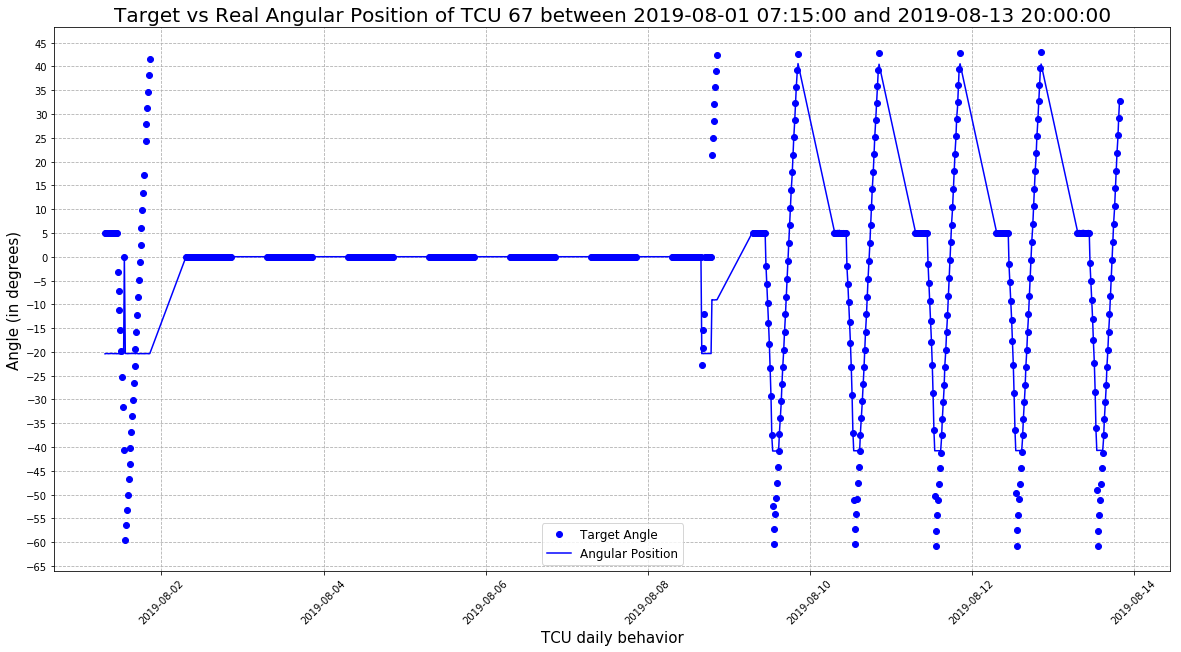

In [17]:
# Plot No. 1 Config - Individual TCU A performance

plt.figure(figsize = (20, 10))
params = {'legend.fontsize': 12,
          'legend.handlelength': 2}
plt.rcParams.update(params)

plt.plot(time_range_timestamp['timestamp'], matrix_plot[2][TCU_A - 1], 'bo', label = 'Target Angle')
plt.plot(time_range_timestamp['timestamp'], matrix_plot[3][TCU_A - 1], 'b', label = 'Angular Position')
plt.title('Target vs Real Angular Position of' + ' TCU ' + TCU_A_number + ' between ' + init_time + ' and ' + end_time, size = 20)
plt.xlabel('TCU daily behavior', size = 15)
plt.ylabel('Angle (in degrees)', size = 15)
plt.xticks(rotation = 45)
plt.locator_params(axis='y', nbins = 40)
plt.grid(linestyle = '--')
plt.legend()

plt.show()

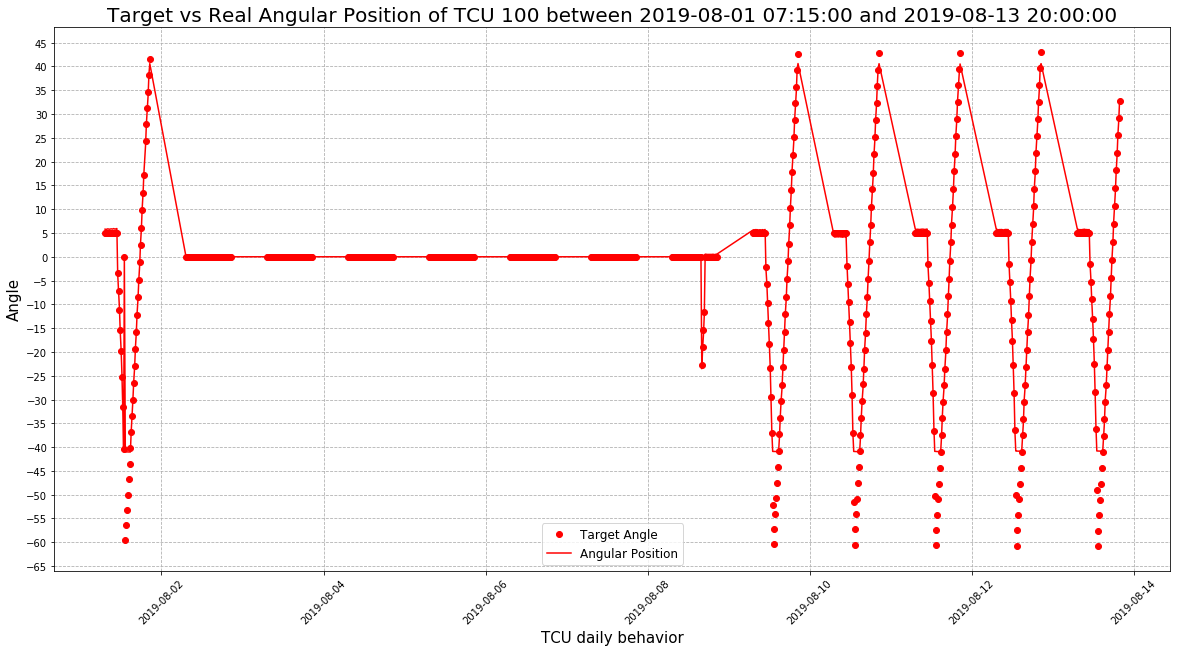

In [18]:
# Plot No. 2 Config - Individual TCU B performance

plt.figure(figsize = (20, 10))
params = {'legend.fontsize': 12,
          'legend.handlelength': 2}
plt.rcParams.update(params)

plt.plot(time_range_timestamp['timestamp'], matrix_plot[2][TCU_B - 1], 'ro', label = 'Target Angle')
plt.plot(time_range_timestamp['timestamp'], matrix_plot[3][TCU_B - 1], 'r', label = 'Angular Position')
plt.title('Target vs Real Angular Position of' + ' TCU ' + TCU_B_number + ' between ' + init_time + ' and ' + end_time, size = 20)
plt.xlabel('TCU daily behavior', size = 15)
plt.ylabel('Angle', size = 15)
plt.xticks(rotation = 45)
plt.locator_params(axis='y', nbins = 40)
plt.grid(linestyle = '--')
plt.legend()
plt.show()

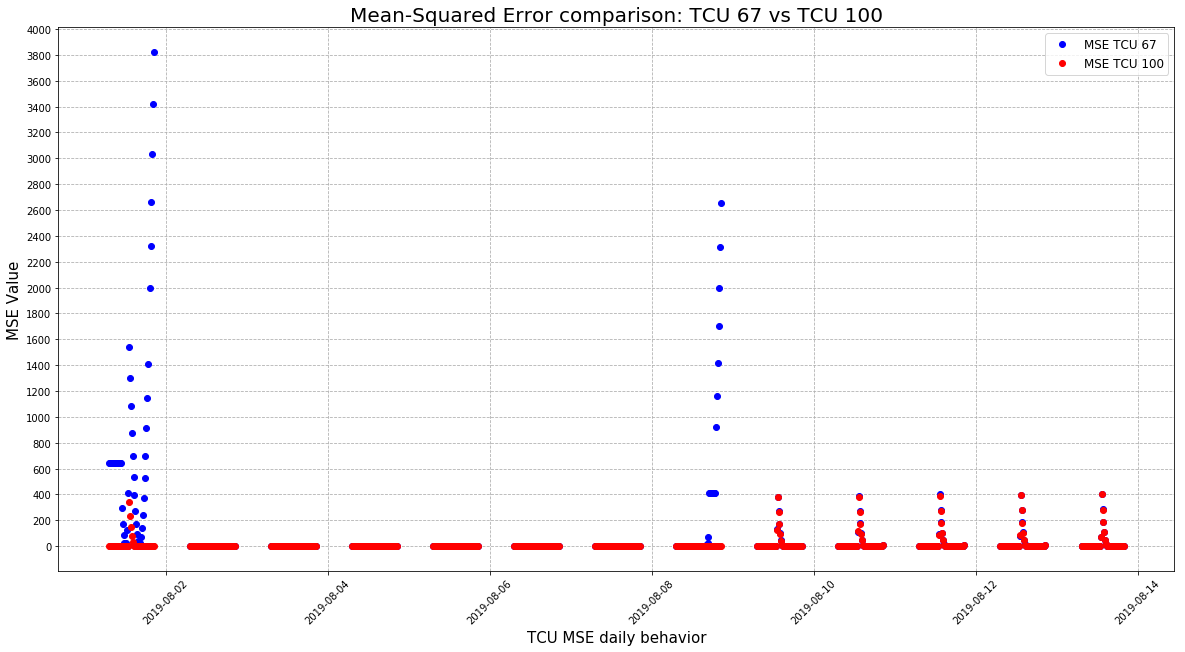

In [19]:
# Plot No. 3 Config - MSE comparison between the two selected TCUs

plt.figure(figsize = (20, 10))
params = {'legend.fontsize': 12,
          'legend.handlelength': 2}
plt.rcParams.update(params)

plt.plot(time_range_timestamp['timestamp'], MSE_agg[:, TCU_A - 1], 'bo', label = 'MSE TCU ' + TCU_A_number)
plt.plot(time_range_timestamp['timestamp'], MSE_agg[:, TCU_B - 1], 'ro', label = 'MSE TCU ' + TCU_B_number)
plt.title('Mean-Squared Error comparison: ' + 'TCU ' + TCU_A_number + ' vs TCU ' + TCU_B_number, size = 20)
plt.xlabel('TCU MSE daily behavior', size = 15)
plt.ylabel('MSE Value', size = 15)
plt.xticks(rotation = 45)
plt.locator_params(axis='y', nbins = 40)
plt.grid(linestyle = '--')
plt.legend()

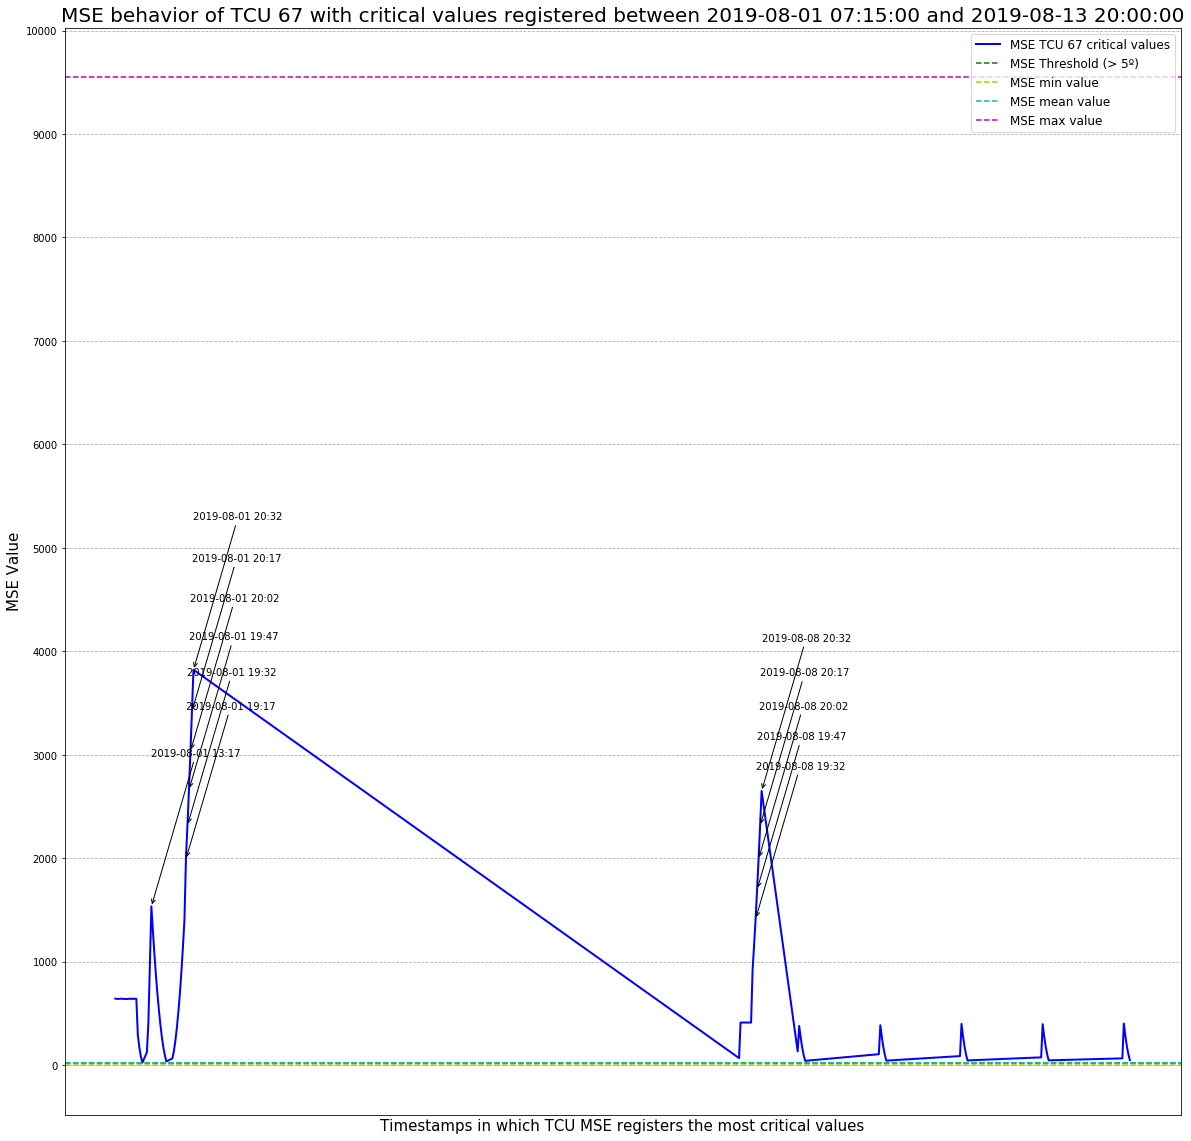

In [20]:
# Plot No. 4 Config - TCU A critical MSE values

plt.figure(figsize = (20, 20))
params = {'legend.fontsize': 12,
          'legend.handlelength': 2}
plt.rcParams.update(params)

plt.plot(TCU_A_matrix_plot_df['Critical Values'], color = 'b', linewidth = 2, label = 'MSE TCU ' + TCU_A_number + ' critical values')
plt.title('MSE behavior of' + ' TCU ' + TCU_A_number + ' with critical values registered between ' + init_time + ' and ' + end_time, size = 20)
plt.xlabel('Timestamps in which TCU MSE registers the most critical values', size = 15)
plt.ylabel('MSE Value', size = 15)
plt.axhline(MSE_threshold_adj, color = 'g', linestyle = '--', label = 'MSE Threshold (> 5º)')
plt.axhline(MSE_min_value, color = 'y', linestyle = '--', label = 'MSE min value')
plt.axhline(MSE_mean_value, color = 'c', linestyle = '--', label = 'MSE mean value')
plt.axhline(MSE_max_value, color = 'm', linestyle = '--', label = 'MSE max value')
plt.xticks([])
plt.locator_params(axis='y', nbins = 20)

for i in range (len(TCU_A_critical_xticks['Timestamps'][:])):
    plt.annotate(str(TCU_A_critical_xticks['Timestamps'][i]), 
                 xy = (TCU_A_critical_xticks['Index No.'][i], TCU_A_critical_xticks['MSE Values'][i]), 
                 arrowprops = dict(arrowstyle = "->",), xytext=(0,150), textcoords = "offset points")
    
plt.grid(linestyle = '--')
plt.legend(loc = 'upper right')
plt.show()

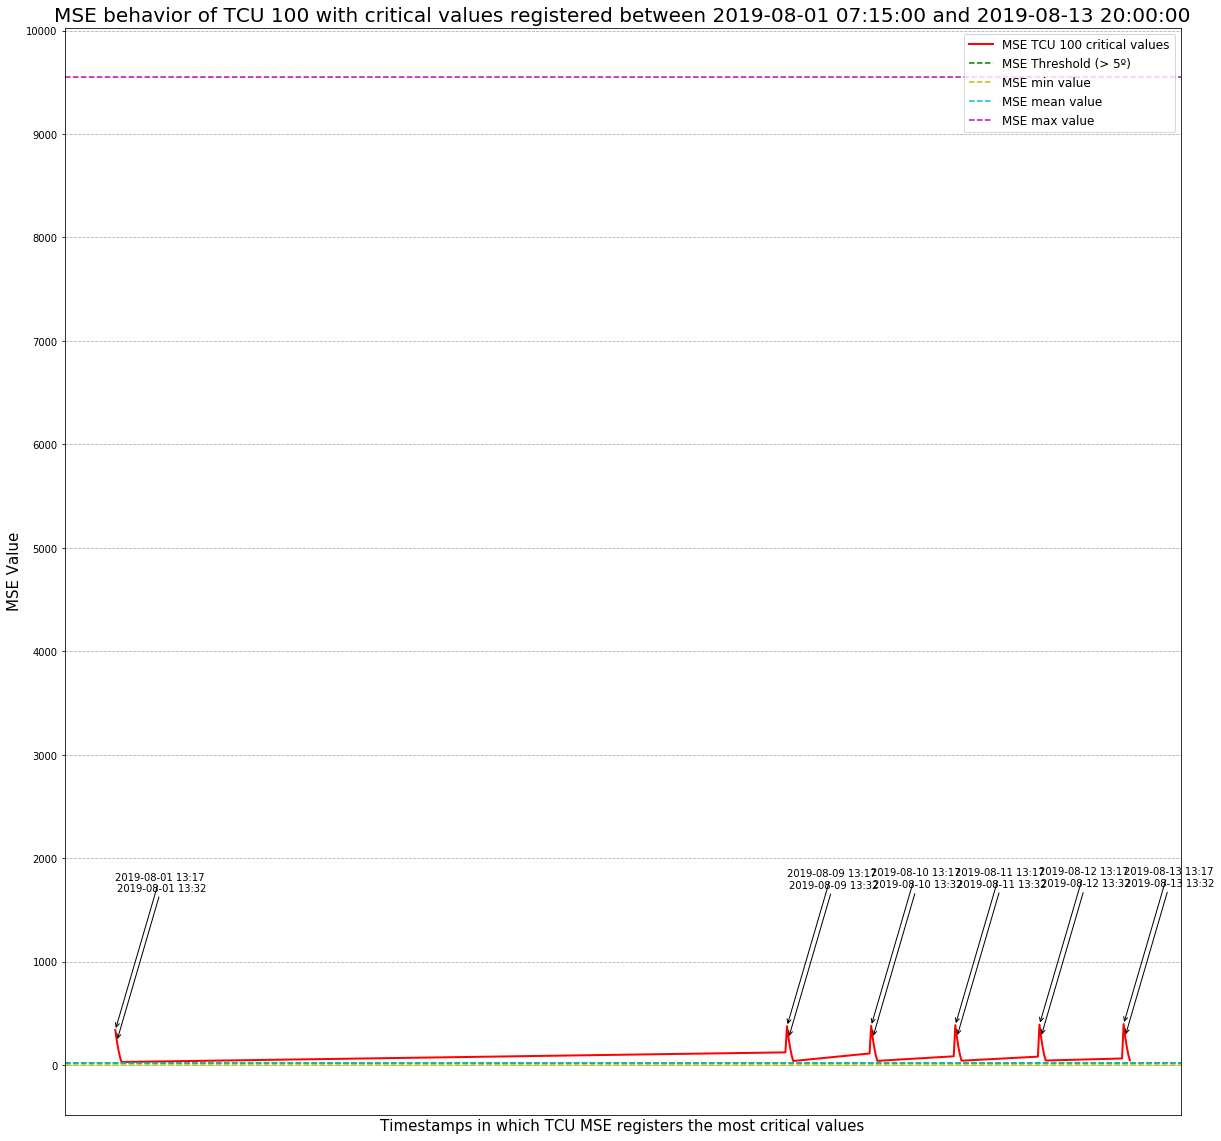

In [21]:
# Plot No. 5 Config - TCU B critical MSE values

plt.figure(figsize = (20, 20))
params = {'legend.fontsize': 12,
          'legend.handlelength': 2}
plt.rcParams.update(params)

plt.plot(TCU_B_matrix_plot_df['Critical Values'], 'r', linewidth = 2, label = 'MSE TCU ' + TCU_B_number + ' critical values')
plt.title('MSE behavior of' + ' TCU ' + TCU_B_number + ' with critical values registered between ' + init_time + ' and ' + end_time, size = 20)
plt.xlabel('Timestamps in which TCU MSE registers the most critical values', size = 15)
plt.ylabel('MSE Value', size = 15)
plt.axhline(MSE_threshold_adj, color = 'g', linestyle = '--', label = 'MSE Threshold (> 5º)')
plt.axhline(MSE_min_value, color = 'y', linestyle = '--', label = 'MSE min value')
plt.axhline(MSE_mean_value, color = 'c', linestyle = '--', label = 'MSE mean value')
plt.axhline(MSE_max_value, color = 'm', linestyle = '--', label = 'MSE max value')
plt.xticks([])
plt.locator_params(axis='y', nbins = 20)

for i in range (len(TCU_B_critical_xticks['Timestamps'][:])):
    plt.annotate(str(TCU_B_critical_xticks['Timestamps'][i]), 
                 xy = (TCU_B_critical_xticks['Index No.'][i], TCU_B_critical_xticks['MSE Values'][i]), 
                 arrowprops = dict(arrowstyle = "->",), xytext=(0,150), textcoords = "offset points")
    
plt.grid(linestyle = '--')
plt.legend(loc = 'upper right')
plt.show()

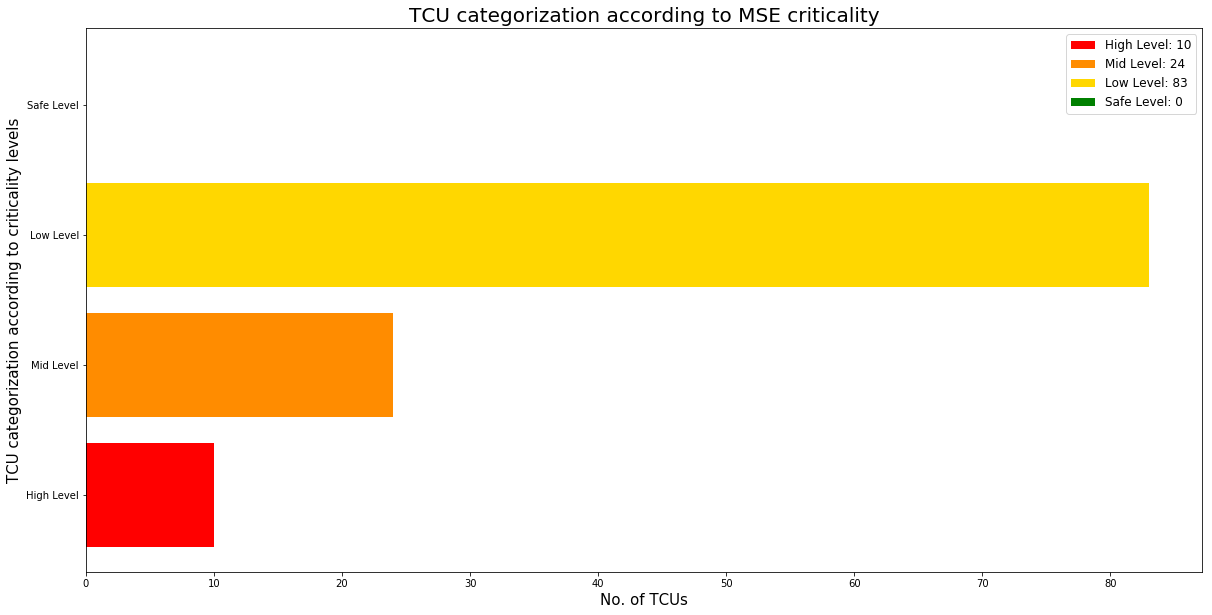

In [22]:
# Plot No. 6 Config - Overall TCU criticality

plt.figure(figsize = (20, 10))
params = {'legend.fontsize': 12,
          'legend.handlelength': 2}
plt.rcParams.update(params)

plt.title('TCU categorization according to MSE criticality', size = 20)
plt.barh('High Level', len(high_critical_TCUs), color = 'r', label = 'High Level: ' + str(len(high_critical_TCUs)))
plt.barh('Mid Level', len(mid_critical_TCUs), color = 'darkorange', label ='Mid Level: ' + str(len(mid_critical_TCUs)))
plt.barh('Low Level', len(low_critical_TCUs), color = 'gold', label = 'Low Level: ' + str(len(low_critical_TCUs)))
plt.barh('Safe Level', len(safe_TCUs), color = 'g', label = 'Safe Level: ' + str(len(safe_TCUs)))
plt.xlabel('No. of TCUs', size = 15)
plt.ylabel('TCU categorization according to criticality levels', size = 15)
plt.legend()

plt.show()

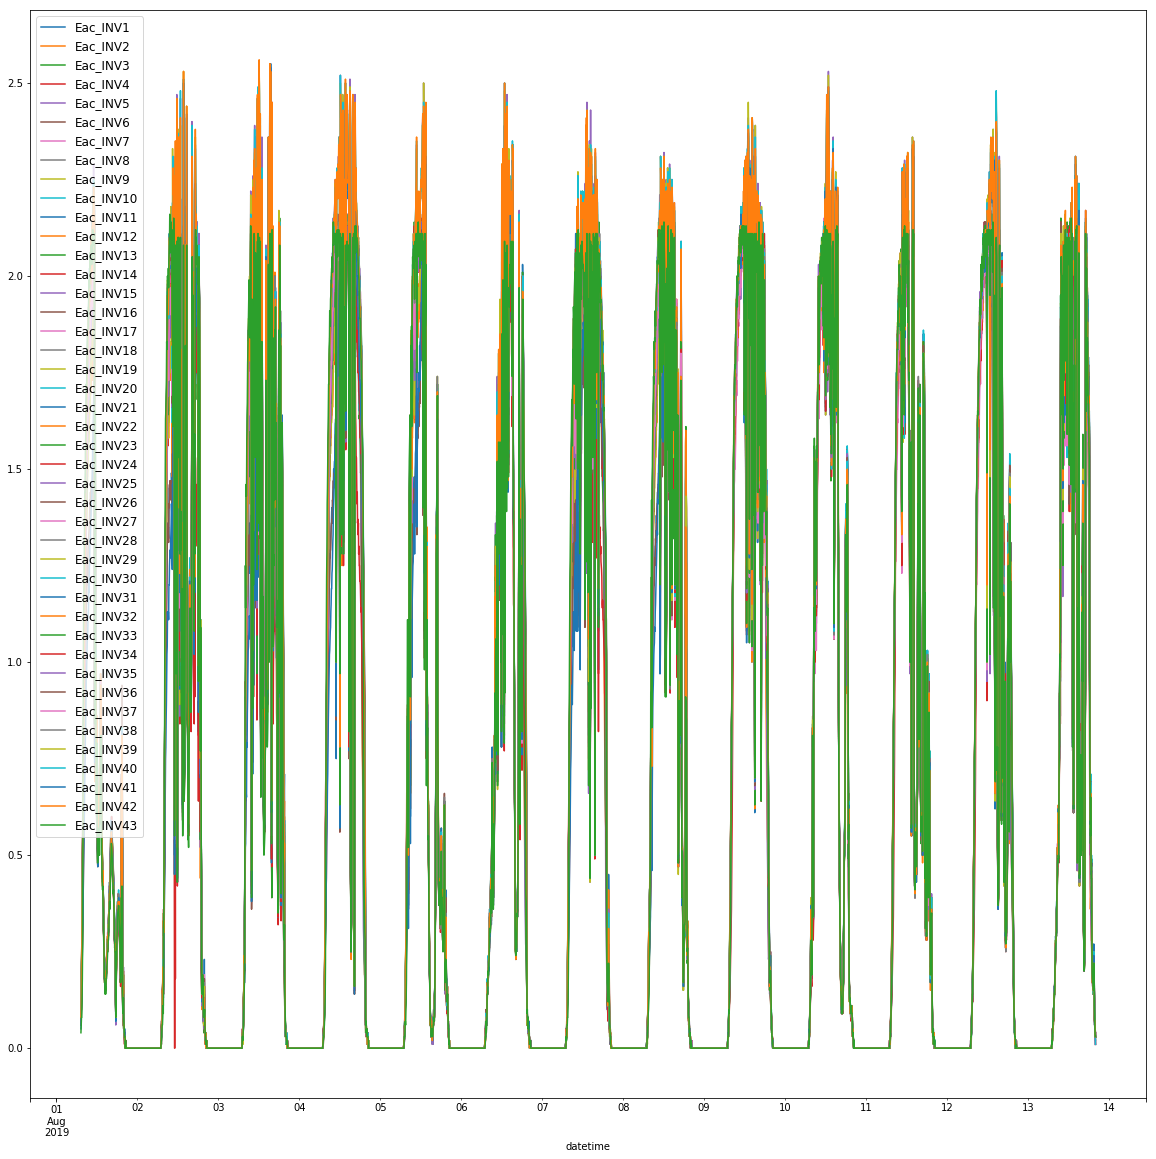

In [23]:
# Plot No. 7 Total Energy Output

prod_matrix.plot()
plt.gcf().set_size_inches(20,20)
plt.show()